In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
from utils.stock_data_utils import StockDataUtil

dockerの割り当てメモリが少ないとこける

In [2]:
price = StockDataUtil.get_price()
print('item count',len(price))

item count 4225441


In [3]:
code = 9984

price_data = price[price["Local Code"] == code].copy()
price_data["datetime"] = pd.to_datetime(price_data["EndOfDayQuote Date"])
price_data.set_index("datetime", inplace=True)
price_data = price_data[:"2019"]
price_data.head()

,Local Code,EndOfDayQuote Date,EndOfDayQuote Open,EndOfDayQuote High,EndOfDayQuote Low,EndOfDayQuote Close,EndOfDayQuote ExchangeOfficialClose,EndOfDayQuote Volume,EndOfDayQuote CumulativeAdjustmentFactor,EndOfDayQuote PreviousClose,EndOfDayQuote PreviousCloseDate,EndOfDayQuote PreviousExchangeOfficialClose,EndOfDayQuote PreviousExchangeOfficialCloseDate,EndOfDayQuote ChangeFromPreviousClose,EndOfDayQuote PercentChangeFromPreviousClose,EndOfDayQuote VWAP
datetime,,,,,,,,,,,,,,,,
2016-01-04,9984,2016/01/04,3025.0,3072.5,2984.5,2996.5,2996.5,12751600.0,2.0,3069.5,2015/12/30,3069.5,2015/12/30,-73.0,-2.378,3011.845
2016-01-05,9984,2016/01/05,2975.0,3023.0,2965.0,2984.5,2984.5,9739400.0,2.0,2996.5,2016/01/04,2996.5,2016/01/04,-12.0,-0.400,2990.394
2016-01-06,9984,2016/01/06,2985.0,3000.0,2911.0,2944.5,2944.5,12891800.0,2.0,2984.5,2016/01/05,2984.5,2016/01/05,-40.0,-1.340,2950.130
2016-01-07,9984,2016/01/07,2944.5,2954.5,2869.5,2875.5,2875.5,11946000.0,2.0,2944.5,2016/01/06,2944.5,2016/01/06,-69.0,-2.343,2902.300
2016-01-08,9984,2016/01/08,2817.5,2921.5,2790.0,2847.5,2847.5,18098200.0,2.0,2875.5,2016/01/07,2875.5,2016/01/07,-28.0,-0.974,2850.308


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


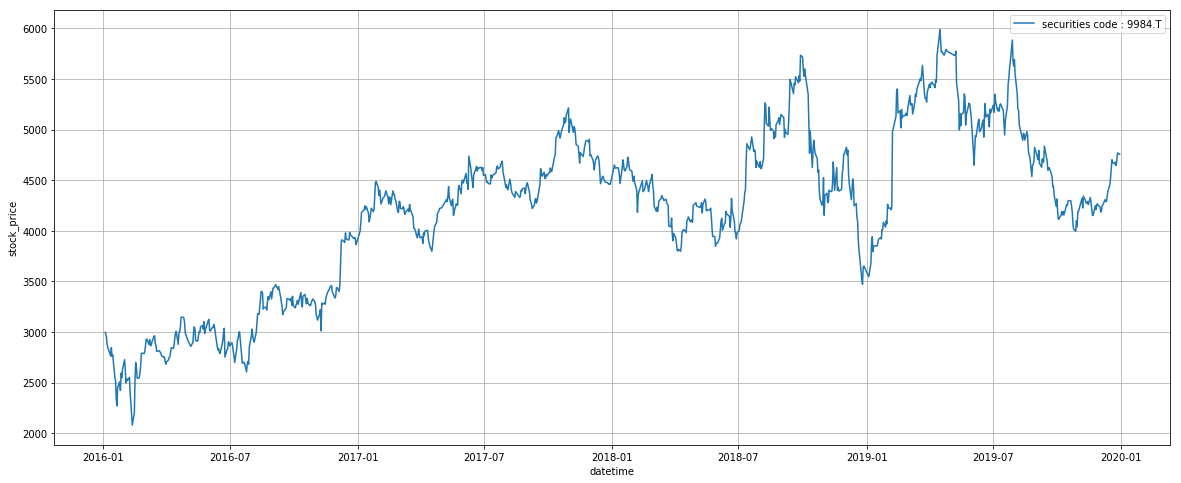

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(price_data["EndOfDayQuote ExchangeOfficialClose"], label=f"securities code : {code}.T")
ax.set_ylabel("stock_price")
ax.set_xlabel("datetime")
ax.grid(True)
ax.legend()

移動平均:
面倒なのでスキップ

価格変化率:

* 区間の初めの値と最後の値の差を初めの値で割ったもの
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.pct_change.html



ヒストリカル・ボラティリティ

* ログの微分の移動標準偏差